In [1]:
import pandas as pd
import statsmodels.formula.api as smf # OLS
from snownlp import SnowNLP
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #忽视警告

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

In [2]:
df = pd.read_excel("【文章】地市级党报2~6月.xlsx")

# 数据探索

In [5]:
df.columns

Index(['城市', '公众号', '帐号名', '标题', '摘要', 'URL', '发布时间', '阅读数', '点赞数', '文章序号',
       '是否原创'],
      dtype='object')

In [6]:
df.head()

,城市,公众号,帐号名,标题,摘要,URL,发布时间,阅读数,点赞数,文章序号,是否原创
0,达州,达州日报,dzrbdzwb,致敬最美逆行者！达州感谢你们！,'致敬最美逆行者！达州感谢你们！,http://mp.weixin.qq.com/s?__biz=MzAwMTEyMjY4Mw...,2018-06-04 17:07:46,100001,3156,1,否
1,达州,达州日报,dzrbdzwb,通川区塔沱市场火灾扑救最新情况通报,'目前，高喷车、举高车、车载水炮等消防装备，已形成合围之势，阻止火势向毗邻建筑蔓延，将其控制...,http://mp.weixin.qq.com/s?__biz=MzAwMTEyMjY4Mw...,2018-06-03 16:26:55,100001,1874,1,否
2,广州,广州日报,guangzhoudaily,汕头大学毕业礼太炫酷，李嘉诚第17次亲临致辞！他宣布了一个决定,'祝汕头大学越来越好,http://mp.weixin.qq.com/s?__biz=MjM5MjA0MDk2MA...,2018-06-29 10:29:10,100001,1385,1,否
3,青岛,青岛日报,qddaily,定了！明晚9点，上合灯光焰火秀震撼上演！（附超全峰会剧透）,'信息量很大！青岛人，转起来！,http://mp.weixin.qq.com/s?__biz=MjM5NTE1NDcwMw...,2018-06-08 14:47:51,100001,1255,1,否
4,江门,江门日报,jm_daily,多图！江门暴雨中的动人瞬间，让人热泪盈眶！一起把大爱温情传递出去,'100001+,http://mp.weixin.qq.com/s?__biz=MzA3NDM2NzkyMg...,2018-06-08 12:45:34,100001,1218,1,否


In [7]:
df.sort_values("点赞数",ascending=False)

,城市,公众号,帐号名,标题,摘要,URL,发布时间,阅读数,点赞数,文章序号,是否原创
0,达州,达州日报,dzrbdzwb,致敬最美逆行者！达州感谢你们！,'致敬最美逆行者！达州感谢你们！,http://mp.weixin.qq.com/s?__biz=MzAwMTEyMjY4Mw...,2018-06-04 17:07:46,100001,3156,1,否
459,长江,长江日报,whcjrb,周先旺武汉履新10日，只为这一件事……,'这是他关注的重点,http://mp.weixin.qq.com/s?__biz=MjM5ODAyNTcwMA...,2018-06-08 14:34:28,100001,2278,1,是
1,达州,达州日报,dzrbdzwb,通川区塔沱市场火灾扑救最新情况通报,'目前，高喷车、举高车、车载水炮等消防装备，已形成合围之势，阻止火势向毗邻建筑蔓延，将其控制...,http://mp.weixin.qq.com/s?__biz=MzAwMTEyMjY4Mw...,2018-06-03 16:26:55,100001,1874,1,否
460,长江,长江日报,whcjrb,东湖来了一帮牛人！看完感觉武汉颜值又被拉高一大截,'周末就去看看,http://mp.weixin.qq.com/s?__biz=MjM5ODAyNTcwMA...,2018-06-29 18:52:08,100001,1789,1,是
2,广州,广州日报,guangzhoudaily,汕头大学毕业礼太炫酷，李嘉诚第17次亲临致辞！他宣布了一个决定,'祝汕头大学越来越好,http://mp.weixin.qq.com/s?__biz=MjM5MjA0MDk2MA...,2018-06-29 10:29:10,100001,1385,1,否
...,...,...,...,...,...,...,...,...,...,...,...
387,温州,温州日报,wzrbwx,浙江高考总分一分一段表、省内高校预估分数线出炉！温州各校战绩如何？,'这个分能上哪些学校？能不能冲？快来看看！,http://mp.weixin.qq.com/s?__biz=MzA5MjAxNjAzMA...,2018-06-23 13:30:00,31643,23,1,否
445,丹东,今日丹东,DDWENEWS,紧急通知！住楼房的一定要看，请停止这个动作！赶快通知家人！,'现在很多地方都有升降电梯，小区、公司、单位等等。你们知道吗？以后要停止这个动作了，太危险！,http://mp.weixin.qq.com/s?__biz=MzA5ODMyMDYwNA...,2018-06-18 12:54:58,29184,21,1,否
275,广州,广州日报,guangzhoudaily,"最后3天！非粤A牌赶紧做这事，可不受""开四停四""管控！",',http://mp.weixin.qq.com/s?__biz=MjM5MjA0MDk2MA...,2018-06-28 12:16:47,40489,19,2,否
270,杭州,杭州日报,hangzhoudaily,打开神秘黑匣，你人生的一万种可能,'你以为人生只有脚下的一条路，什么限制了你？,http://mp.weixin.qq.com/s?__biz=MjM5NzkwNTA5Mg...,2018-06-23 12:06:34,40762,17,5,否


## 标题长度

In [14]:
df["len_title"] = df["标题"].str.len()

In [18]:
df["len_title"].describe()

count    500.000000
mean      28.920000
std        7.305912
min        2.000000
25%       24.000000
50%       29.000000
75%       34.000000
max       51.000000
Name: len_title, dtype: float64

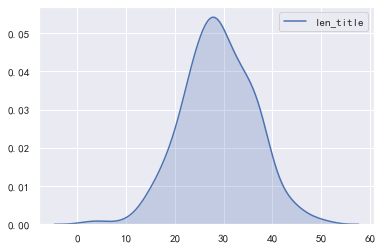

In [24]:
sns.kdeplot(df["len_title"], shade=True)

## 感叹号的使用

In [11]:
df["count_!"] = df["标题"].str.count("！")
df["count_!"].value_counts()

1    178
0    170
2    125
3     20
4      7
Name: count_!, dtype: int64

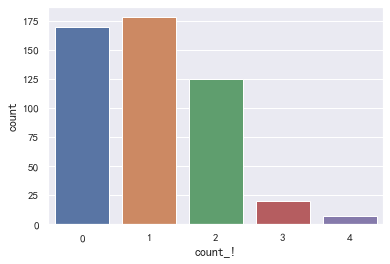

In [13]:
sns.countplot(x = "count_!", data = df)

## 问号的使用

In [26]:
df["count_?"] = df["标题"].str.count("？")
df["count_?"].value_counts()

0    450
1     47
2      3
Name: count_?, dtype: int64

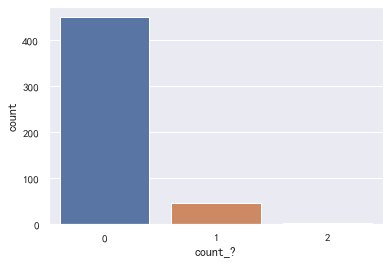

In [27]:
sns.countplot(x = "count_?", data = df)

In [29]:
df[["count_?","count_!"]].corr()

,count_?,count_!
count_?,1.000000,-0.011098
count_!,-0.011098,1.000000


# 分词

In [3]:
# 通过for循环遍历来进行所有标题的分词
import jieba
words = []
for i, row in df.iterrows():
    word = jieba.cut(row['标题'])
    result = ' '.join(word) 
    words.append(result)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lin\AppData\Local\Temp\jieba.cache
Loading model cost 1.636 seconds.
Prefix dict has been built successfully.


In [4]:
words[0:3]  # 展示前三条新闻的分词结果

['致敬 最美 逆 行者 ！ 达州 感谢 你们 ！',
 '通川区 塔沱 市场 火灾 扑救 最新 情况通报',
 '汕头大学 毕业 礼太炫酷 ， 李嘉诚 第 17 次 亲临 致辞 ！ 他 宣布 了 一个 决定']

In [5]:
# 将之前所有的新闻标题进行文本向量化
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X = vect.fit_transform(words)
X = X.toarray()

In [6]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
# 查看所有新闻标题的词袋
words_bag = vect.vocabulary_
print(words_bag)

{'致敬': 2090, '最美': 1513, '行者': 2135, '达州': 2268, '感谢': 1254, '你们': 397, '通川区': 2342, '塔沱': 837, '市场': 1095, '火灾': 1726, '扑救': 1293, '最新': 1508, '情况通报': 1236, '汕头大学': 1629, '毕业': 1608, '礼太炫酷': 1928, '李嘉诚': 1543, '17': 13, '亲临': 330, '致辞': 2092, '宣布': 1011, '一个': 120, '决定': 513, '明晚': 1464, '上合': 205, '灯光': 1730, '焰火': 1744, '震撼': 2447, '上演': 212, '附超全': 2418, '峰会': 1082, '剧透': 584, '多图': 855, '江门': 1632, '暴雨': 1491, '动人': 593, '瞬间': 1914, '热泪盈眶': 1740, '一起': 178, '大爱': 885, '温情': 1702, '传递': 380, '出去': 529, '国家': 807, '刚刚': 560, '公布': 477, '422': 51, '先进县': 447, '名单': 730, '咱省': 767, '10': 1, '地方': 818, '入选': 453, '家乡': 1017, '浙江': 1674, '这种': 2305, '馒头': 2476, '出事': 527, '几十名': 522, '摊主': 1377, '杭州人': 1555, '注意': 1657, '甄别': 1821, '女子': 931, '银行': 2389, '1100': 5, '取钱': 684, '柜员': 1559, '一张': 151, '公安局': 475, '地址': 817, '狂风暴雨': 1779, '高考': 2503, '这些': 2288, '镜头': 2392, '温暖': 1703, '广州': 1127, '习近平': 308, '重大': 2369, '青岛': 2452, '迎来': 2277, '重磅': 2375, '利好': 566, '大金句': 894, '儿子': 440, 

In [8]:
# 查看词袋中词的数目
len(words_bag)

2524

In [9]:
# 查看前两条分词完的新闻
print(words[0])
print(words[1])

致敬 最美 逆 行者 ！ 达州 感谢 你们 ！
通川区 塔沱 市场 火灾 扑救 最新 情况通报


In [10]:
# 文本向量化
vect = CountVectorizer()  # 引入CountVectorizer()函数
X_test = vect.fit_transform(words[0:2])  # 将前两条新闻文本向量化
X_test = X_test.toarray()  # 将X_test转为数组
print(X_test)  # 查看生成的二维数组

[[1 0 0 0 1 0 0 1 0 1 1 1 0]
 [0 1 1 1 0 1 1 0 1 0 0 0 1]]


In [11]:
# 查看词袋的第一种方式
words_bag = vect.vocabulary_  # 第一种查看词袋的方式
print(words_bag)  # 查看词袋

{'致敬': 9, '最美': 7, '行者': 10, '达州': 11, '感谢': 4, '你们': 0, '通川区': 12, '塔沱': 1, '市场': 2, '火灾': 8, '扑救': 5, '最新': 6, '情况通报': 3}


In [12]:
# 查看词袋的第二种方式
words_bag2 = vect.get_feature_names()  # 第二种查看词袋的方法
print(words_bag2)  # 第二种查看词袋的方式

['你们', '塔沱', '市场', '情况通报', '感谢', '扑救', '最新', '最美', '火灾', '致敬', '行者', '达州', '通川区']


In [13]:
df = pd.DataFrame(X_test, columns=words_bag2)
df

,你们,塔沱,市场,情况通报,感谢,扑救,最新,最美,火灾,致敬,行者,达州,通川区
0,1,0,0,0,1,0,0,1,0,1,1,1,0
1,0,1,1,1,0,1,1,0,1,0,0,0,1


In [14]:
# 将之前所有的新闻标题进行文本向量化并通过pandas展示
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# 文本向量化
vect = CountVectorizer()
X = vect.fit_transform(words)  # 将分词后的内容文本向量化
X = X.toarray()

# 查看文本向量化的结果
words_bag2 = vect.get_feature_names()  # 第二种查看词袋的方法
df = pd.DataFrame(X, columns=words_bag2)
df.head()

,09,10,100,1000,11,1100,115,116,12,122,...,黄山市,黄色,黑匣,黑斑,黑河,黑色,默默,鼻子,龙头,龙舟
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=10, random_state=123)
k_data = kms.fit_predict(df)

In [18]:
print(k_data)

[4 4 4 3 1 4 4 4 4 3 4 3 1 4 4 4 9 3 3 4 4 4 4 9 4 4 4 4 4 9 1 1 4 4 4 4 4
 4 4 4 4 4 7 4 9 4 4 4 7 4 4 2 9 9 4 1 1 9 4 4 3 4 4 4 4 2 9 4 4 4 9 4 9 3
 3 4 2 4 5 4 9 4 4 4 1 4 1 4 2 4 9 4 4 4 4 9 3 4 4 4 4 4 1 4 4 4 3 4 4 7 4
 4 4 4 4 2 4 9 4 4 4 4 3 4 1 9 1 4 4 9 4 4 4 4 4 3 4 3 4 4 9 2 4 4 2 4 9 4
 4 3 4 4 9 4 4 8 2 9 3 4 4 4 1 4 4 4 4 4 9 4 4 6 4 4 4 4 4 4 4 4 4 4 4 0 4
 4 8 2 4 1 1 4 4 4 4 4 4 4 9 4 1 9 4 4 4 2 4 9 4 4 2 4 4 4 4 1 4 1 4 1 4 4
 2 4 1 4 4 4 4 4 4 4 9 4 9 4 4 4 1 4 4 2 4 4 4 4 4 4 9 4 4 4 4 4 4 4 2 1 4
 4 4 4 1 4 4 4 4 4 4 4 4 2 4 4 2 4 4 4 5 1 9 2 1 4 4 4 4 4 4 4 4 7 4 3 1 2
 4 4 4 2 4 4 9 4 1 4 4 4 1 4 4 6 3 4 4 9 4 4 4 4 4 4 1 4 4 4 4 4 4 4 2 4 4
 4 4 4 4 4 4 4 4 4 4 4 2 3 4 1 4 4 4 4 1 4 9 2 2 4 1 4 2 4 4 4 1 9 4 4 4 9
 4 2 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 9 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 1 4 4 4 4 4 4 4 2 9 4 4 4 4 4 2 2 4 4 4 4 4 9 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 4 6 4 4 4 4 4 3 9 4 9 4 4 1 1 4 4 9 4 4 4 4 4 1
 9 4 4 9 4 4 4 4 1 6 4 4 

In [22]:
import numpy as np
words_ary = np.array(words)
print(words_ary[k_data == 4])  # 可以把数字1改成其他数字看看效果

['致敬 最美 逆 行者 ！ 达州 感谢 你们 ！' '通川区 塔沱 市场 火灾 扑救 最新 情况通报'
 '汕头大学 毕业 礼太炫酷 ， 李嘉诚 第 17 次 亲临 致辞 ！ 他 宣布 了 一个 决定'
 '国家 刚刚 公布 422 个 先进县 （ 市 、 区 ） 名单 ！ 咱省 有 10 个 地方 入选 ， 有 你 家乡 吗 ？'
 '浙江 这种 馒头 出事 了 ! 几十名 摊主 被 抓 ! 杭州人 请 注意 甄别 …'
 '女子 在 银行 存 1100 万 ， 取钱 时 柜员 递 出 一张 纸 ， 写 着 公安局 地址'
 '在 狂风暴雨 中 高考 ， 这些 镜头 温暖 了 每 一个 广州 人'
 '儿子 摔了一跤 ， 医生 一针 打 下去 却 引发 了 一场 大 抢救 ！ 这位 爸爸 的 自述 值得 所有 家长 看看 ！'
 '定 了 ！ 江湛 高铁 今天下午 6 时 开售 ， 湛江 到 广州 最低 206 元' '西宁 花街 大 PK ， 评评 哪 最美 ？'
 '雷暴雨 + 8 级 大风 ！ 凶猛 的 龙舟 水 明天 强袭 ！ 12 日 下班 、 13 日 上下班 要 特别 注意 ！'
 '6 月 7 日 ， 青海 的 雪 下 得 如此 惊人 ... 深达 半米'
 '重磅 ！ 新华社 播发 长篇 通讯 《 习近平 同志 推动 厦门经济特区 建设 发展 的 探索 与 实践 》'
 '紧急 扩散 ！ 今明两天 ， 尽量 不要 去 五四 广场 了 ！' '吓人 ！ 公园 散步 回来 ， 十几个 月 大 的 孩子 几乎 毁容 ！'
 '小学生 在家 玩抖音 ， 妈妈 洗澡 被 直播 ！ 还有 更 恶劣 的 … …' '叫 你 生二孩 ！ 叫 你 生二孩 ！ 笑 晕 了 …'
 '慎入 ！ 女子 乳房 里 取出 3 条活 虫 ， 医生 都 吓一跳 ！ 她 爱喝 的 这个 东西 你家 也 有 … …'
 '粤西 第一条 高铁 马上 进站 ！ 最新 最全 消息 都 在 这里 ！'
 '湛江 高铁 票 上线 了 ！ 据说 还 能 在 车上 点 肯德基 … …'
 '高铁 票价 多少 ？ 班次 多少 ？ 这份 调查 问卷 ， 湛江 人必 做'
 '96 岁 赌王 何鸿燊 正式 退休 ， 没想到 这个 女儿 成 了 接班人'
 '6 日 - 12 日 ， 青岛 公交车 有

# 情感分析

In [18]:
from snownlp import SnowNLP

In [17]:
title_list[0]

'致敬最美逆行者！达州感谢你们！'

In [12]:
s1 = SnowNLP(title_list[0])
s1.sentiments

0.9866128788667892

In [15]:
title_list[1]

'通川区塔沱市场火灾扑救最新情况通报'

In [16]:
s2 = SnowNLP(title_list[1])
s2.sentiments

0.04934650330941004

In [23]:
mylist = []
for item in title_list:
    mylist.append(SnowNLP(item).sentiments)

In [27]:
df_sentiments = pd.DataFrame({"sentiments": mylist})
df_sentiments 

,sentiments
0,0.986613
1,0.049347
2,0.986362
3,0.962844
4,0.999998
...,...
495,0.954061
496,0.991881
497,0.898945
498,0.999018


In [28]:
df_sentiments.describe()

,sentiments
count,500.000000
mean,0.629987
std,0.371410
min,0.000007
25%,0.226229
50%,0.794225
75%,0.981081
max,0.999998


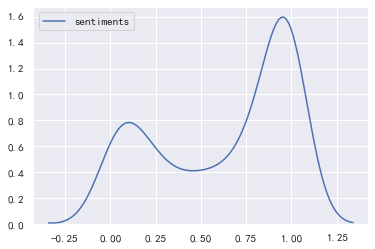

In [30]:
sns.kdeplot(df_sentiments['sentiments'])

In [39]:
df_new = pd.concat([df,df_sentiments], axis = 1)
df_new.sort_values("sentiments",ascending=False)[["标题","sentiments"]].head(10)

,标题,sentiments
4,多图！江门暴雨中的动人瞬间，让人热泪盈眶！一起把大爱温情传递出去,0.999998
10,儿子摔了一跤，医生一针打下去却引发了一场大抢救！这位爸爸的自述值得所有家长看看！,0.999995
57,浙江高考作文题出炉！果然是“世纪”考生需要思考的题！妈宝娃真的写不出！,0.999994
458,风雨中，阳江高考考场外，等来的除了作文题目，还有这些暖心瞬间……,0.999990
478,【视频】泪奔！临川一中师生改编《成都》，千人校园合唱迎高考！,0.999985
20,重磅！新华社播发长篇通讯《习近平同志推动厦门经济特区建设发展的探索与实践》,0.999977
364,暴雨无情佛山有情！高考第二日，这一幕感动无数佛山人...,0.999972
92,曾遭班主任猥亵，19岁少女跳楼自杀，围观者却在起哄、直播、嘲笑……,0.999941
434,夜读 | 他身患“不死的癌症”，坐轮椅考上清华…请相信奋斗的力量！,0.999937
152,快讯！2018泉州高考文理科第一名揭晓！都来自晋江……,0.999906


In [38]:
df_new.sort_values("sentiments")[["标题","sentiments"]].head(10)

,标题,sentiments
100,可怕！滴滴司机喝了几杯酒，钱没了车没了，尿检还呈阳性？！只因为…,0.000007
268,"突发!""千万别倒车!""杭州街头一电瓶车被卷进半挂车,听到路人狂喊司机吓得从车上滚下来...",0.000038
47,115斤美女相亲被拒，怒减30多斤！结果4个月后出门都得带着尿不湿……,0.000091
110,花2万多请来特级月嫂，照料后，宝宝收到病危通知单……,0.000495
402,西安高新一中与榆林高新完全中学签订合作办学协议,0.000583
45,"定了！非广州号牌7月1日起""开四停四""！这个神器能帮你算日期",0.000709
127,最担心的事情发生了：睡觉时蟑螂爬进耳朵，还生下后代！,0.000765
245,以为是感冒，治疗半月不见好，一查竟染上“懒汉病”！跟他常接触这些有关....,0.001599
58,紧急提醒！朋友圈这条消息千万别点，已经有人上当,0.001653
250,"吓人!随手拍了下,浙江一婴儿几乎毁容!这种常见的虫子千万不能拍死!应该...",0.002409


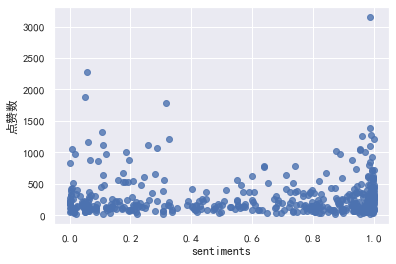

In [41]:
sns.regplot(x = "sentiments", y = "点赞数",data = df_new, fit_reg=False)

In [40]:
df_new[["点赞数","sentiments"]].corr()

,点赞数,sentiments
点赞数,1.000000,-0.019794
sentiments,-0.019794,1.000000


In [42]:
def good_news(var):
    if var >= 0.5:
        return "yes"
    else:
        return "no"

In [44]:
df_new["good_news"] = df_new["sentiments"].apply(good_news)
df_new

,城市,公众号,帐号名,标题,摘要,URL,发布时间,阅读数,点赞数,文章序号,是否原创,sentiments,good_news
0,达州,达州日报,dzrbdzwb,致敬最美逆行者！达州感谢你们！,'致敬最美逆行者！达州感谢你们！,http://mp.weixin.qq.com/s?__biz=MzAwMTEyMjY4Mw...,2018-06-04 17:07:46,100001,3156,1,否,0.986613,yes
1,达州,达州日报,dzrbdzwb,通川区塔沱市场火灾扑救最新情况通报,'目前，高喷车、举高车、车载水炮等消防装备，已形成合围之势，阻止火势向毗邻建筑蔓延，将其控制...,http://mp.weixin.qq.com/s?__biz=MzAwMTEyMjY4Mw...,2018-06-03 16:26:55,100001,1874,1,否,0.049347,no
2,广州,广州日报,guangzhoudaily,汕头大学毕业礼太炫酷，李嘉诚第17次亲临致辞！他宣布了一个决定,'祝汕头大学越来越好,http://mp.weixin.qq.com/s?__biz=MjM5MjA0MDk2MA...,2018-06-29 10:29:10,100001,1385,1,否,0.986362,yes
3,青岛,青岛日报,qddaily,定了！明晚9点，上合灯光焰火秀震撼上演！（附超全峰会剧透）,'信息量很大！青岛人，转起来！,http://mp.weixin.qq.com/s?__biz=MjM5NTE1NDcwMw...,2018-06-08 14:47:51,100001,1255,1,否,0.962844,yes
4,江门,江门日报,jm_daily,多图！江门暴雨中的动人瞬间，让人热泪盈眶！一起把大爱温情传递出去,'100001+,http://mp.weixin.qq.com/s?__biz=MzA3NDM2NzkyMg...,2018-06-08 12:45:34,100001,1218,1,否,0.999998,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,黑河,今日黑河,jrhh0456,黑河花车巡游燃爆通江路！没看过瘾，明天接着看！,'精彩提前看,http://mp.weixin.qq.com/s?__biz=MzAwMDM4MTEyOQ...,2018-06-27 16:38:32,30425,80,1,是,0.954061,yes
496,松原,松原日报,songyuandaily,我市优秀考生出炉！ 刘奥然697分（理科）王楚626分（文科）,',http://mp.weixin.qq.com/s?__biz=MzA5MDQwMTE3MA...,2018-06-23 17:38:35,30369,71,1,是,0.991881,yes
497,梅州,梅州日报,mzrbweixin,梅州高考学霸天团亮相！高分秘籍大公开！,'围观！,http://mp.weixin.qq.com/s?__biz=MjM5MTAwMTMzOA...,2018-06-25 18:17:54,30339,76,2,是,0.898945,yes
498,福州,福州日报,fuzhouribao,重磅！福州四环时代真的要来了！这些区域迎来大机遇！“世界第二”大桥顺利合龙！,'啊~四环~你比三环多一环~,http://mp.weixin.qq.com/s?__biz=MzA3NzY1MjIwNA...,2018-06-11 20:30:21,30315,91,1,是,0.999018,yes


In [46]:
df_good_news = df_new[df_new.good_news == "yes"]
df_bad_news = df_new[df_new.good_news == "no"]

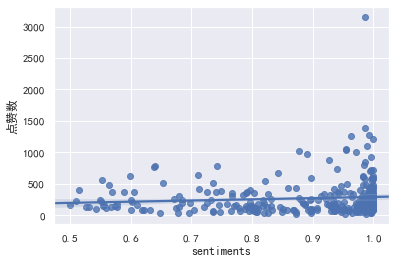

In [47]:
sns.regplot(x = "sentiments", y = "点赞数",data = df_good_news)

In [49]:
df_good_news[["点赞数","sentiments"]].corr()

,点赞数,sentiments
点赞数,1.000000,0.089371
sentiments,0.089371,1.000000


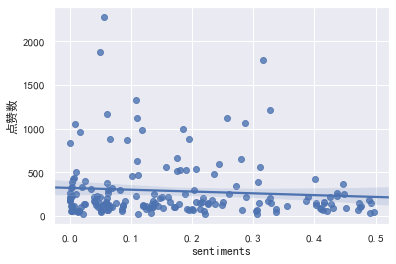

In [48]:
sns.regplot(x = "sentiments", y = "点赞数",data = df_bad_news)

In [50]:
df_bad_news[["点赞数","sentiments"]].corr()

,点赞数,sentiments
点赞数,1.000000,-0.087174
sentiments,-0.087174,1.000000


# 主题建模

In [4]:
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [5]:
def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

In [6]:
df["content_cutted"] = df["标题"].apply(chinese_word_cut)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lin\AppData\Local\Temp\jieba.cache
Loading model cost 0.784 seconds.
Prefix dict has been built successfully.


In [7]:
df["content_cutted"].head(10)

0                              致敬 最美 逆 行者 ！ 达州 感谢 你们 ！
1                              通川区 塔沱 市场 火灾 扑救 最新 情况通报
2       汕头大学 毕业 礼太炫酷 ， 李嘉诚 第 17 次 亲临 致辞 ！ 他 宣布 了 一个 决定
3      定 了 ！ 明晚 9 点 ， 上合 灯光 焰火 秀 震撼 上演 ！ （ 附超全 峰会 剧透 ）
4    多图 ！ 江门 暴雨 中 的 动人 瞬间 ， 让 人 热泪盈眶 ！ 一起 把 大爱 温情 传...
5    国家 刚刚 公布 422 个 先进县 （ 市 、 区 ） 名单 ！ 咱省 有 10 个 地方...
6           浙江 这种 馒头 出事 了 ! 几十名 摊主 被 抓 ! 杭州人 请 注意 甄别 …
7     女子 在 银行 存 1100 万 ， 取钱 时 柜员 递 出 一张 纸 ， 写 着 公安局 地址
8                   在 狂风暴雨 中 高考 ， 这些 镜头 温暖 了 每 一个 广州 人
9    习近平 宣布 重大 决定 ！ 青岛 迎来 重磅 利好 ！ （ 附 习近平 上合 峰会 10 ...
Name: content_cutted, dtype: object

In [8]:
n_features = 1000

tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(df.content_cutted)

In [9]:
from sklearn.decomposition import LatentDirichletAllocation


In [ ]:
n_components = 4
lda = LatentDirichletAllocation(n_components = n_components, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [11]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=50, n_components=5, random_state=0)

In [12]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [13]:
n_top_words = 20


In [14]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
高考 2018 出炉 分数线 理科 公布 文科 快讯 刚刚 广东 看看 发布 重磅 青海 注意 今年 这样 这些 他们 江门
Topic #1:
杭州 孩子 妈妈 家长 这样 他们 注意 崩溃 真相 女儿 看看 这种 医生 明天 一定 重磅 发现 广东 男子 快讯
Topic #2:
女子 湛江 高铁 江门 明天 这个 医生 今年 发现 真相 广东 暴雨 这样 他们 广州 千万别 这种 出炉 注意 看看
Topic #3:
青岛 今天 暴雨 上合 峰会 结果 千万别 发布 重磅 这种 女儿 明天 公布 这些 这样 这个 孩子 注意 真相 青海
Topic #4:
男子 这些 这个 一个 广州 新闻 发现 广东 一定 今年 青海 医生 崩溃 注意 真相 重磅 这样 千万别 暴雨 高考



In [15]:
import pyLDAvis
from  pyLDAvis import sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

E:\installation\Anaconda\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.311182  0.198354       1        1  28.624290
1      0.081414 -0.179356       2        1  19.390868
3     -0.139616 -0.246776       3        1  19.337187
4      0.179374  0.132300       4        1  19.231078
2      0.190010  0.095478       5        1  13.416575, topic_info=   Term       Freq      Total Category  logprob  loglift
45   高考  61.000000  61.000000  Default  30.0000  30.0000
29   杭州  36.000000  36.000000  Default  29.0000  29.0000
16   女子  24.000000  24.000000  Default  28.0000  28.0000
43   青岛  25.000000  25.000000  Default  27.0000  27.0000
32   湛江  20.000000  20.000000  Default  26.0000  26.0000
..  ...        ...        ...      ...      ...      ...
3    上合   0.221836  14.767064   Topic5  -6.1564  -2.1895
4    今天   0.221666  16.104184   Topic5  -6.1572  -2.2770
29   杭州   0.223031  36.808223   Topic5  -6.1511  -3.0975
45   高考   0.222346  61.182673   Topic5  -6.1541  -3.6087
43   青岛   0.222183  25.873994   Topic5  -6.1549  -2.7488

[217 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         1  0.970588  2018
1         4  0.914039    一个
2         2  0.195802    一定
2         4  0.685308    一定
3         3  0.948056    上合
...     ...       ...   ...
43        3  0.966221    青岛
44        1  0.299716    青海
44        4  0.699337    青海
45        1  0.980670    高考
46        5  0.925650    高铁

[72 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 5, 3])

In [ ]:
data = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
pyLDAvis.show(data)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8894/    [Ctrl-C to exit]


127.0.0.1 - - [05/Nov/2020 20:09:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Nov/2020 20:09:14] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [05/Nov/2020 20:09:15] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Nov/2020 20:09:15] "GET /LDAvis.js HTTP/1.1" 200 -


# Reference
- [如何用Python从海量文本抽取主题？](https://medium.com/@wshuyi/%E5%A6%82%E4%BD%95%E7%94%A8python%E4%BB%8E%E6%B5%B7%E9%87%8F%E6%96%87%E6%9C%AC%E6%8A%BD%E5%8F%96%E4%B8%BB%E9%A2%98-a802e8608d39)

- [如何用Python做情感分析？](https://medium.com/@wshuyi/%E5%A6%82%E4%BD%95%E7%94%A8python%E5%81%9A%E6%83%85%E6%84%9F%E5%88%86%E6%9E%90-9df4d49acaa3)